<a href="https://colab.research.google.com/github/nicklausmillican/StatisticalRethinkingIISolutions/blob/main/StatisticalRethinkingSolutions2_Ch4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages(c("coda","mvtnorm","devtools","loo","dagitty"))
devtools::install_github("rmcelreath/rethinking@slim")

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘later’, ‘promises’, ‘shiny’, ‘downlit’, ‘htmlwidgets’, ‘Rcpp’, ‘miniUI’, ‘pkgdown’, ‘profvis’, ‘urlchecker’, ‘checkmate’, ‘matrixStats’, ‘V8’





shape (NA -> 1.4.6) [CRAN]


Installing 1 packages: shape

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpNYEukK/remotes1062838a1d/rmcelreath-rethinking-cbcb8ba/DESCRIPTION’ ... OK
* preparing ‘rethinking’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* looking to see if a ‘data/datalist’ file should be added
* building ‘rethinking_2.13.2.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(rethinking)

Loading required package: parallel

rethinking (Version 2.13.2)


Attaching package: ‘rethinking’


The following object is masked from ‘package:stats’:

    rstudent




# Chapter 4
## Easy
### 4E1
#### Question
In the model definition below, which line is the likelihood?
*   $y_i \sim Normal(\mu, \sigma)$
*   $\mu \sim Normal(0, 10)$
*   $\sigma \sim Exponential(1)$

#### Answer
The 1st line is the likelihood.  It describes the data, $y$ as being generated from a normal distribution with a $mean = \mu$ and a $standard\ deviation = \sigma$.  Tthe subscript, $_i$, is meant to denote that each single observation in the data is described this way.
The 2nd and 3rd lines, which describe parameters, are priors for the mean ($\mu$) and standard deviation of ($\sigma$).

It might be useful to know that data are values that are actually observed and parameters are values that we trying to estimate.

### 4E2
#### Question
In the model definition just above, how many parameters are in the posterior distribution?

#### Answer
After running Bayes, we get a posterior distribution for every parameter.  Here, that is $\mu$ and $\sigma$.  

Actually, we get a posterior for every parameter that is not defined by other parameters.  That probably doesn't make sense just yet, but later chapters will show how we might define, say, $\mu$ in terms of other parameters.  For example, we might get the following model:
*   $y_i \sim Normal(\mu, \sigma)$
*   $\mu = \alpha + \beta*x_i$
*   $\alpha \sim Normal(0, 10)$
*   $\beta \sim Normal(0, 1)$
*   $\sigma \sim Exponential(1)$

So in this case, we'd get a posterior for $\alpha$, $\beta$, and $\sigma$, but not $\mu$.  Instead, we'll use $\alpha$ and $\beta$ to construct the posterior for $\mu$.

### 4E3
#### Question
Using the model definition above, write down the appropriate form of Bayes' theorem that includes the proper likelihood and priors.

#### Answer
Recall that Bayes' theorem is:
   $posterior = \frac{prior(s) \cdot likelihood} {marginal}$.

*   First, we need a posterior over each parameter ($mu$ and $sigma$).  This will be a joint distribution since we are looking for the distirbution of values that satisfies our data and contraints simultaneously:

   $p(\mu, \sigma | y)$

*   Next we need a prior for both parameters.  In this case, we assume these prior are indepdent, so we'll write them as a product.

   $p(\mu) \cdot p(\sigma)$

Let's expand these, since we have already assigned them distributions:

   $Normal(\mu|0,10) \cdot Exponential(\sigma|1)$

*   Now, the same for the likelihood:

   $p(y_i|\mu, \sigma) → Normal(y_i|\mu, \sigma)$

*   And finally, the marginal, in which we combine all possible values of the likelihood weighted by their priors.  This means we'll use integration:

   $\int\int p(y_i|\mu, \sigma) \cdot p(\mu) \cdot p(\sigma) \  d\mu \  d\sigma \ \rightarrow \int\int Normal(y_i|\mu, \sigma) \cdot Normal(\mu|0,10) \cdot Exponential(\sigma|1)$

Putting it all together:

   $posterior = \frac{prior(s) \cdot likelihood} {marginal} \rightarrow
   p(\mu, \sigma | y) = \frac{p(y_i|\mu, \sigma) \cdot p(\mu) \cdot p(\sigma)} {\int\int p(y_i|\mu, \sigma) \cdot p(\mu) \cdot p(\sigma) \  d\mu \  d\sigma} \rightarrow
   p(\mu, \sigma | y) = \frac{Normal(y_i|\mu, \sigma) \cdot Normal(\mu|0,10) \cdot Exponential(\sigma|1)} {\int\int Normal(\mu|0,10) \cdot Exponential(\sigma|1) \ d\mu \ d\sigma} \$

### 4E4
#### Question
In the model definition below, which line is the linear model?
*   $y_i \sim Normal(\mu, \sigma)$
*   $\mu_i = \alpha + \beta*x_i$
*   $\alpha \sim Normal(0, 10)$
*   $\beta \sim Normal(0, 1)$
*   $\sigma \sim Exponential(2)$

#### Answer
When you read "linear model", you might bring to mind the equation of a line, $y = m*x + b$, or some such equation.  In this case, that would bring you to the right answer.  The linear model above is line 2: $\mu_i = \alpha + \beta*x_i$.

More generally, a linear model is an equation that follows this rule: **All parameters can be written as either scalers (like $\alpha$) or products with data (like $\beta*x_i$); parameters can not be multiplied together (like $\alpha*\beta$, $\beta*\beta=\beta^2$, or $\alpha^\beta$) or be part of a power term (like $\beta^x$ or $x^\beta$**.

This more-general definition will allow for more complicated models, incorporating more predictive variables: $y=\alpha_1+\alpha_2+\beta_1*x_1+\beta_2*x_2+\beta_3*x_3...$

### 4E5
#### Question
In the model definition just above, how many parameters are in the posterior distribution?

#### Answer
As in 4E2, we count the number of parameters in our model that are not defined by other parameters.  Here, we have 4 parameters: $\alpha$, $\beta$, $\mu$, and $\sigma$.  But $\mu$ is defined by other parameters (in the linear model) and therefore is not directly estimated by a posterior distribution.

## Medium
### 4M1
#### Question
For the model definition below, simulate observed y values from the prior (not the posterior).
*   $y_i \sim Normal(\mu, \sigma)$
*   $\mu_i \sim Normal(0, 10)$
*   $\sigma \sim Exponential(1)$

#### Answer
We are creating a **prior predictive distribution** here.  A simple way to do this is to simulate the parameters with `rnorm` (to simulate samples from a normal distribution for $\mu$) and `rexp` (to simulate samples from an exponential distribution for $\sigma$) commands, then use the output of these functions to simulate $y$.

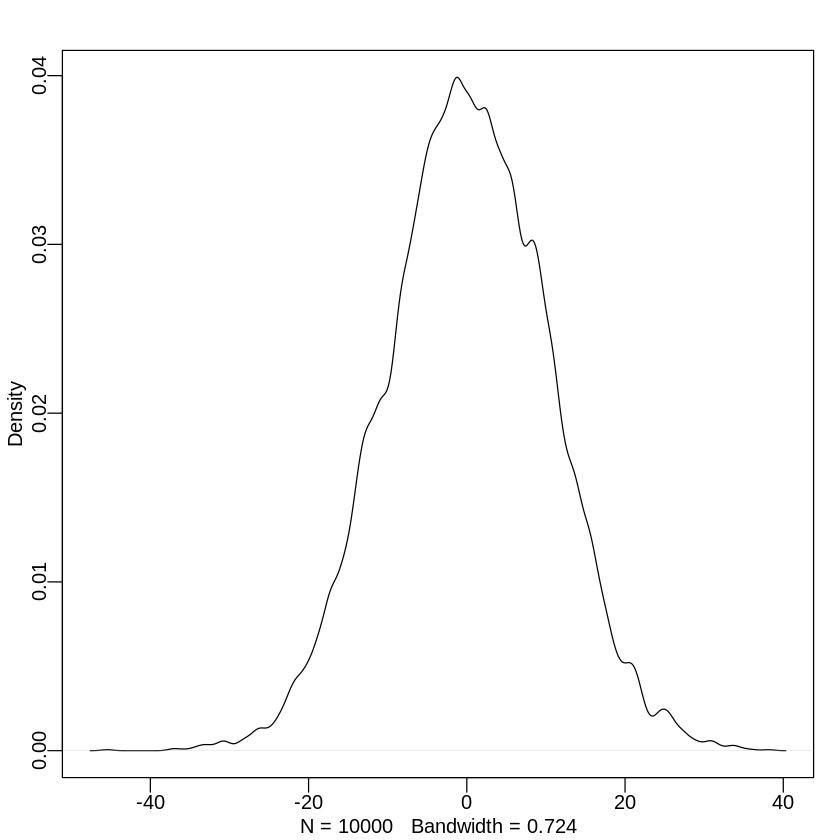

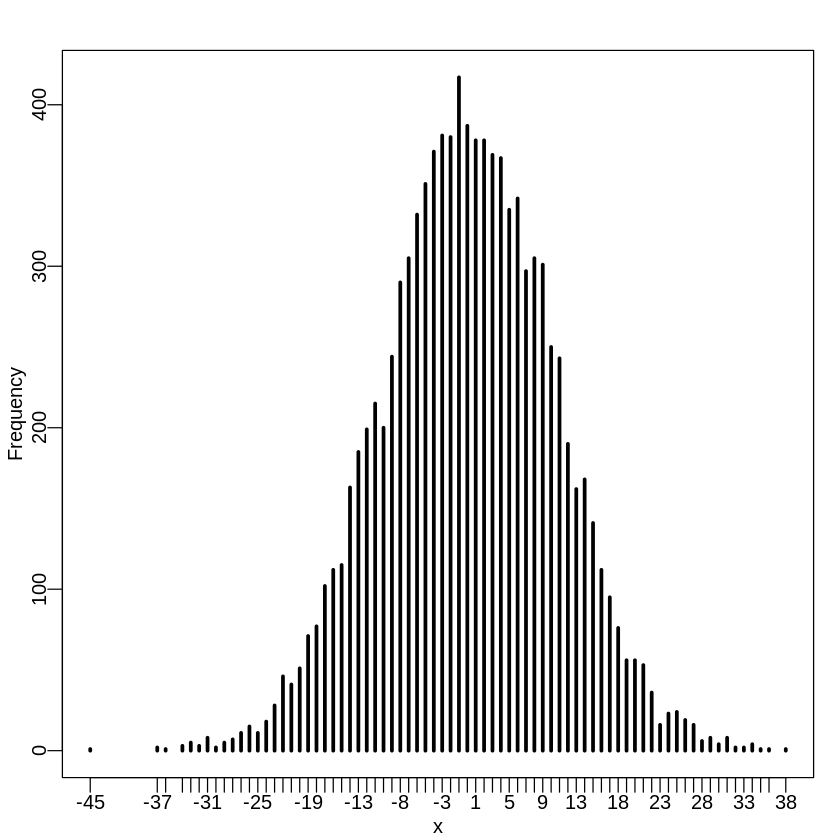

In [ ]:
mu_prior <- rnorm(n=10000, mean=0, sd=10)
sigma_prior <- rexp(n=10000, rate=1)

y_prior <- rnorm(10000, mean=mu_prior, sd=sigma_prior)

dens(y_prior)
simplehist(y_prior)

Here, we've simulated 10,000 samples from the prior distributions for $\mu$ and $\sigma$.  Then we fed each of the samples, one by one, into a new `rnorm` command to simulate $y$.

### 4M2
#### Question
Translate the model just above into a `quap` formula.

#### Answer

In [ ]:
model <- quap(
  alist(
    y ~ dnorm(mu, sigma),
      mu ~ dnorm(0, 10),
      sigma ~ dexp(1)
  ), # data here ...
)

### 4M3
#### Question
Translate the `quap` model formula below into a mathematical model definition:

>```
y ~ dnorm(mu, sigma)
mu <- a + b*x
a ~ dnorm(0, 10)
b ~ dunif(0, 1)
sigma ~ dexp(1)
```

#### Answer
*   $y_i \sim Normal(\mu, \sigma)$
*   $\mu_i = \alpha + \beta*x_i$
*   $\alpha \sim Normal(0, 10)$
*   $\beta \sim Uniform(0, 1)$
*   $\sigma \sim Exponential(1)$

### 4M4-4M6
#### Questions
4.   A sample of students is measured for height each year for 3 years. After the third year, you want to fit a linear regression predicting height using year as a predictor. Write down the mathematical model definition for this regression, using any variable names and priors you choose. Be prepared to defend your choice of priors.

5.   Now suppose I remind you that every student got taller each year. Does this information lead you to change your choice of priors? How?

6.   Now suppose I tell you that the variance among heights for students of the same age is never more than 64cm (~25.2 inches). How does this lead you to revise your priors?

#### Answer
I'm combining answer to 4M4-4M6 here because they are trying to get us to think through our priors.

*   $height_{s,y} \sim Normal(\mu_{s,y}, \sigma)$
*   $\mu_{s,y} = \alpha + \beta*(year_y - \overline{year})$
*   $\alpha \sim Normal(65, 5)$
*   $\beta \sim Half Normal(1, 1)$
*   $\sigma \sim Uniform(0, \sqrt{25.2})$

Of course, the question doesn't give the age of the student, so I'm imagining middle schoolers.

Here, the subscript $_s$ is a measure on a student and the subscript $_y$ is the the measure in a given year; so $_{s,y}$ is a single measurement taken on a student in 1 of 3 years.  In the case of $\overline{year}$, which has no subscript, we are *marginalizing* (i.e., averaging) over all measurements.

I'm working in inches here.  So the $\alpha \sim Normal(65, 5)$ means that I am assuming the average height to ~65 inches.  The $\beta \sim Half Normal(1, 1)$ implies that I think students will grow ~1 inch each year; the $Half Normal$ distribution ensures that the average height of students increases each year, which seems like a good assumption.  The prior for sigma, $\sigma \sim Uniform(0, \sqrt{25.2})$ is a bit wonky.  Question 4M6 tells us that the variance ($\sigma^2$) is never more than 25.2 inches; this means that the standard deviation ($\sigma$) is never more than $\sqrt{25.2}$.

The question asks us to justify these priors, so let's do some visualization.

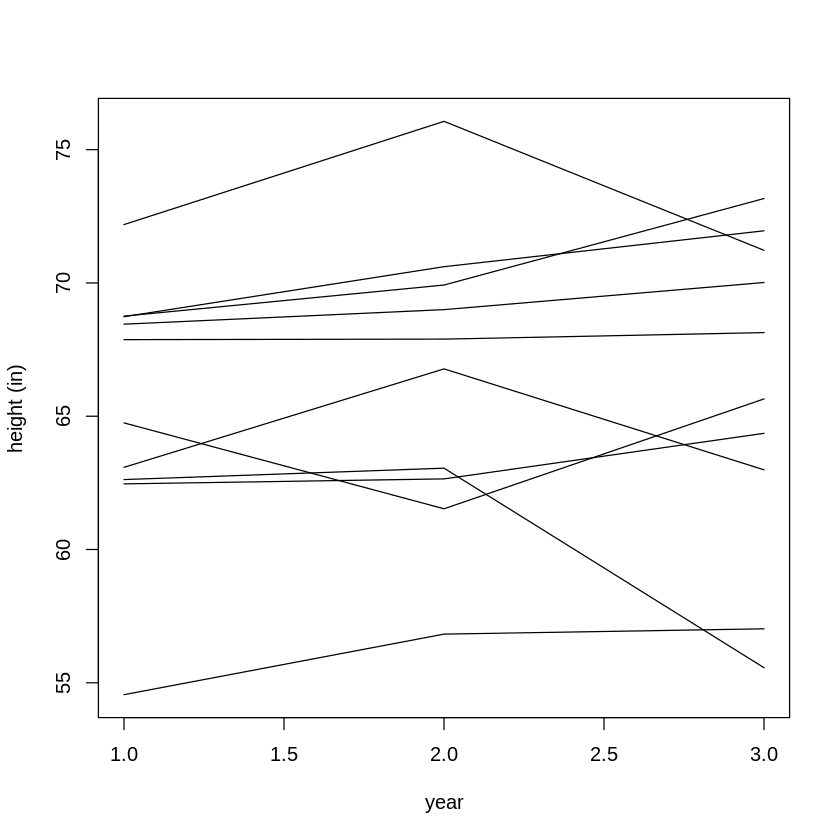

In [ ]:
n <- 10
a <- rnorm(n=n, mean=65, sd=5)
b <- abs(rnorm(n=n, mean=1, sd=1)) # To get a half-normal distribution, I'm taking the absolute value of a normal distribution
s <- runif(n=n, min=0, max=sqrt(25.2))

year <- 1:3
year_bar <- mean(year)
height <- matrix(data=NA, nrow=n, ncol=length(year))
for(student in 1:n){
  for(yr in 1:length(year)){
    height[student, yr] <- rnorm(n=1,
                                 mean=a[student] + b[student]*(year[yr]-year_bar),
                                 sd=s[student])
  }
}

plot(NULL, xlim=c(1,3), ylim=range(height), xlab="year", ylab="height (in)")
for(student in 1:n){
  lines(1:3, height[student,])
}

So our prior generally predicts heights around ~50 - ~80 inches, with the bulk between ~55 - 70 inches; this seems reasonable to me.  It also predicts that student will typically grow each year, some growing slowly and others with rapid spurts; another reasonable assumption.  But you'll also notice that some (very few) students are shrinking.  How could this be when we were so clever to use a $Half Normal$ distribution?  The answer is because of our $\sigma$; it allows for some few subsequent heights to be less than the previous.  Maybe shrinkage happens, or maybe we're not happy with it.  But for now, we'll accept it as a prior and allow our data to correct it.

### 4M7
#### Question
Refit model `m4.3` from the chapter, but omit the mean weight `xbar` this time. Compare the new model’s posterior to that of the original model. In particular, look at the covariance among the parameters. What is different? Then compare the posterior predictions of both models.

#### Answer
Let's start with by running model `m4.3` from the chapter, and then modify it as per the question.

In [ ]:
data(Howell1)
d <- Howell1
d2 <- d[d$age >= 18,]
xbar <- mean(d2$weight)

m4.3 <- quap(
  alist(
    height ~ dnorm(mu, sigma),
      mu <- a + b*(weight - xbar),
        a ~ dnorm(178, 20),
        b ~ dlnorm(0, 1),
      sigma ~ dunif(0, 50)
  ), data=d2
)

m4.3b <- quap(
  alist(
    height ~ dnorm(mu, sigma),
      mu <- a + b*weight,
        a ~ dnorm(178, 20),
        b ~ dlnorm(0, 1),
      sigma ~ dunif(0, 50)
  ), data=d2
)

Now let's compare the posteriors.

In [ ]:
round(precis(m4.3), 2)
round(precis(m4.3b), 2)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,154.60,0.27,154.17,155.03
b,0.90,0.04,0.84,0.97
sigma,5.07,0.19,4.77,5.38


,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,114.53,1.90,111.50,117.57
b,0.89,0.04,0.82,0.96
sigma,5.07,0.19,4.77,5.38


The $\beta$, `b`, and $\sigma$, `sigma`, parameters are similar between the two model, implying that the rate of `height` by `weight` and variability are similar between the model (as we should expect).  But what is the intercept $\alpha$, `a`, different between models?  
In `m4.3`, the intercept value of height is predicted when `weight = xbar`.  But in `m4.3b`, the intercept value of height occurs when `weight = 0`.

Next, let's check out the covariance among parameters.  Actually, for ease of interpretation, we'll look at the correlations among parameters.

,a,b,sigma
a,1,0,0
b,0,1,0
sigma,0,0,1


,a,b,sigma
a,1.00,-0.99,0.03
b,-0.99,1.00,-0.03
sigma,0.03,-0.03,1.00


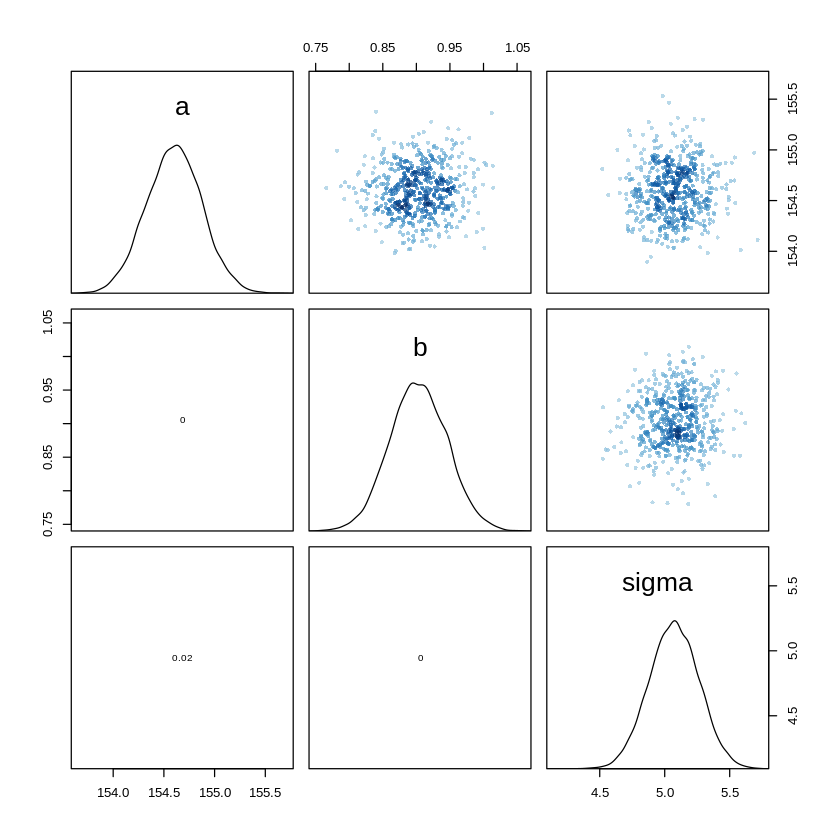

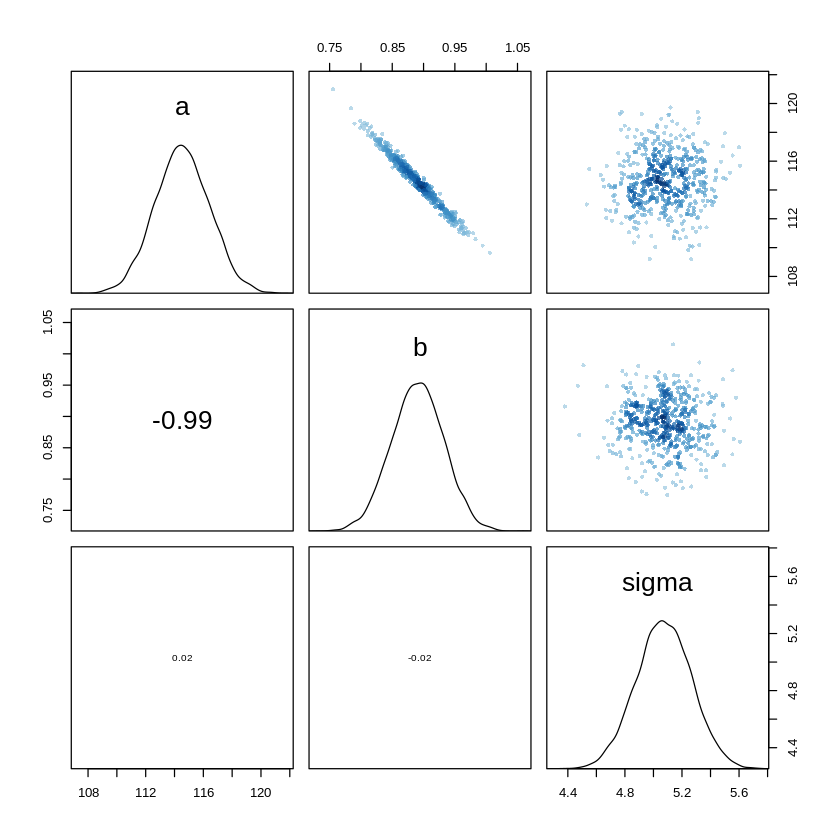

In [ ]:
round(cov2cor(vcov(m4.3)), 2)
round(cov2cor(vcov(m4.3b)), 2)

suppressWarnings(pairs(m4.3))
suppressWarnings(pairs(m4.3b))

Whereas there is basically not correlation among parameters for `m4.3`, the intercept `a` and the slope `b` are almost perfectly negatively correlated in `m4.3b`.  What's going on here?  
Let's start with what is NOT going on.  The correlation in `m4.3b` is NOT really due to some relationship between `height` and `weight`; that relationship is captured in `b`.  
Instead, recall that the model is *guessing* values for `a` and `b`.  When it guesses a relatively low value for `b`, i.e., a weak relationship between `height` and `weight`, it must also guess that more of the observed `height` is due to `a`.  Conversely, when it guesses a relatively high value for `b`, there is less `height` to be explained by `a`.  This effect is actually present for both models `m4.3` and `m4.3b`, it's just more extreme in model `m4.3b`.  When we don't center with `weight - xbar`, a weak relationship between `height` and `weight` leaves a lot of `height` for `a` to account for.

Finally, let's compare the predictions of the two models.

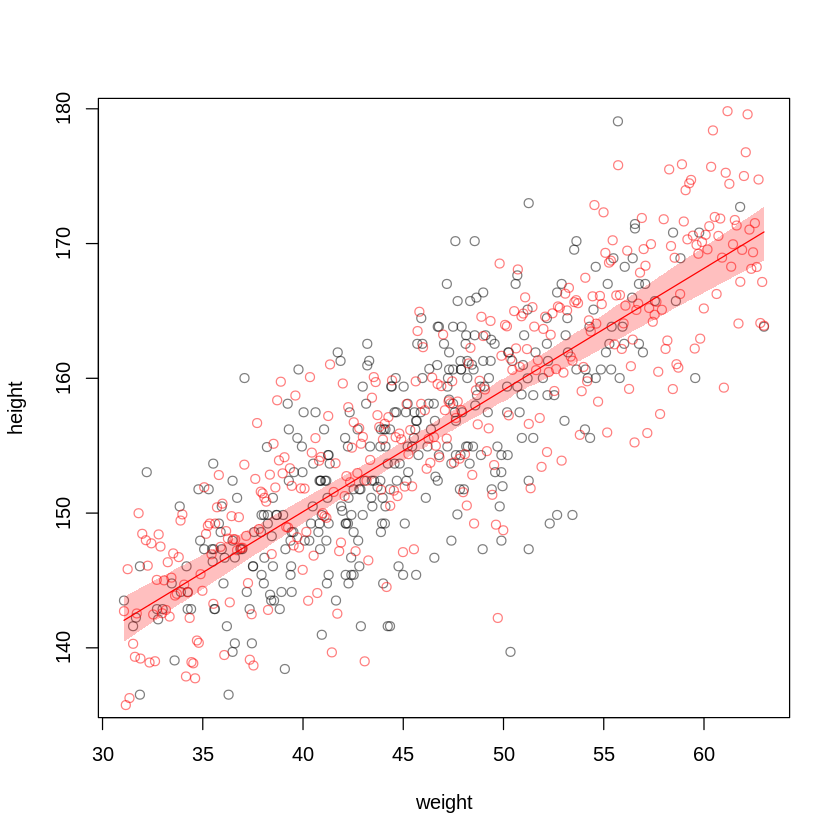

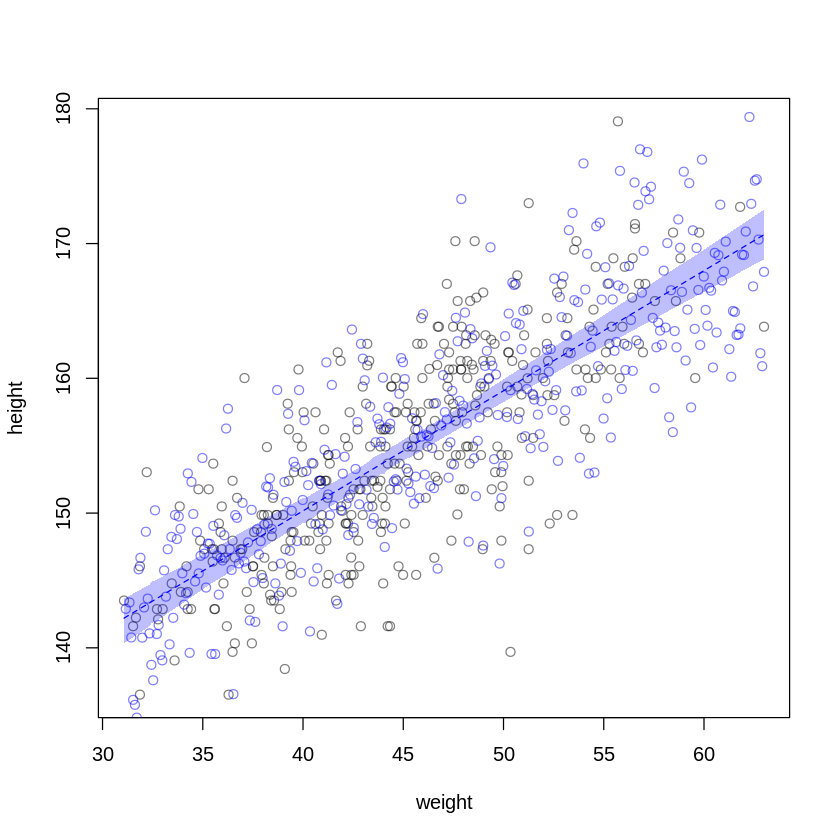

In [ ]:
post_m4.3 <- extract.samples(m4.3)
post_m4.3b <- extract.samples(m4.3b)

weight_seq <- seq(from=min(d2$weight), to=max(d2$weight), length.out=length(d2$weight))
mu_m4.3 <- link(m4.3, data=data.frame(weight=weight_seq))
sim_m4.3 <- sim(m4.3, data=data.frame(weight=weight_seq))
mu_m4.3b <- link(m4.3b, data=data.frame(weight=weight_seq))
sim_m4.3b <- sim(m4.3b, data=data.frame(weight=weight_seq))

plot(height ~ weight, data=d2, col=col.alpha("black", 0.5))
points(x=weight_seq, y=diag(sim_m4.3), col=col.alpha("red", 0.5))
lines(x=weight_seq, y=apply(mu_m4.3, 2, mean), col="red")
shade(object=apply(mu_m4.3, 2, HPDI, prob=0.99), lim=weight_seq, col=col.alpha("red", 0.25))

plot(height ~ weight, data=d2, col=col.alpha("black", 0.5))
points(x=weight_seq, y=diag(sim_m4.3b), col=col.alpha("blue", 0.5))
lines(x=weight_seq, y=apply(mu_m4.3b, 2, mean), col="blue", lty=2)
shade(object=apply(mu_m4.3b, 2, HPDI, prob=0.99), lim=weight_seq, col=col.alpha("blue", 0.25))

### 4M8
#### Question
In the chapter, we used 15 knots with the cherry blossom spline. Increase the number of knots and observe what happens to the resulting spline. Then adjust also the width of the prior on the weights—change the standard deviation of the prior and watch what happens. What do you think the combination of knot number and the prior on the weights controls?

#### Answer
Let's start by replicating the code from the book.

In [ ]:
data(cherry_blossoms)
d <- cherry_blossoms
d2 <- d[complete.cases(d$doy),]
d2

In [ ]:
num_knots <- 15
knot_list <- quantile(d2$year, probs=seq(from=0, to=1, length.out=num_knots))
knot_degree <- 3
knot_list

ERROR: Error in eval(expr, envir, enclos): object 'd2' not found


In [ ]:
library(splines)
B <- bs(d2$year,
        knots=knot_list[-c(1, num_knots)],
        degree=knot_degree,
        intercept=TRUE)

B is a matrix with with a row for every date in d2 and a column for every knot.  It creates 17, rather than num_knots=15, knots; two additional ones for the beginning and end of dates.  We can visualze B below.

1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
1.0000000,0.0000000,0.0000000000,0.000000e+00,0,0,0,0,0,0,0,0,0,0,0,0,0
0.9603571,0.0393123,0.0003298367,7.286030e-07,0,0,0,0,0,0,0,0,0,0,0,0,0
0.7665095,0.2207460,0.0125594810,1.850922e-04,0,0,0,0,0,0,0,0,0,0,0,0,0
0.5633407,0.3856737,0.0493848352,1.600741e-03,0,0,0,0,0,0,0,0,0,0,0,0,0
0.5452670,0.3986837,0.0541894688,1.859854e-03,0,0,0,0,0,0,0,0,0,0,0,0,0
0.4527321,0.4597597,0.0837138624,3.794349e-03,0,0,0,0,0,0,0,0,0,0,0,0,0


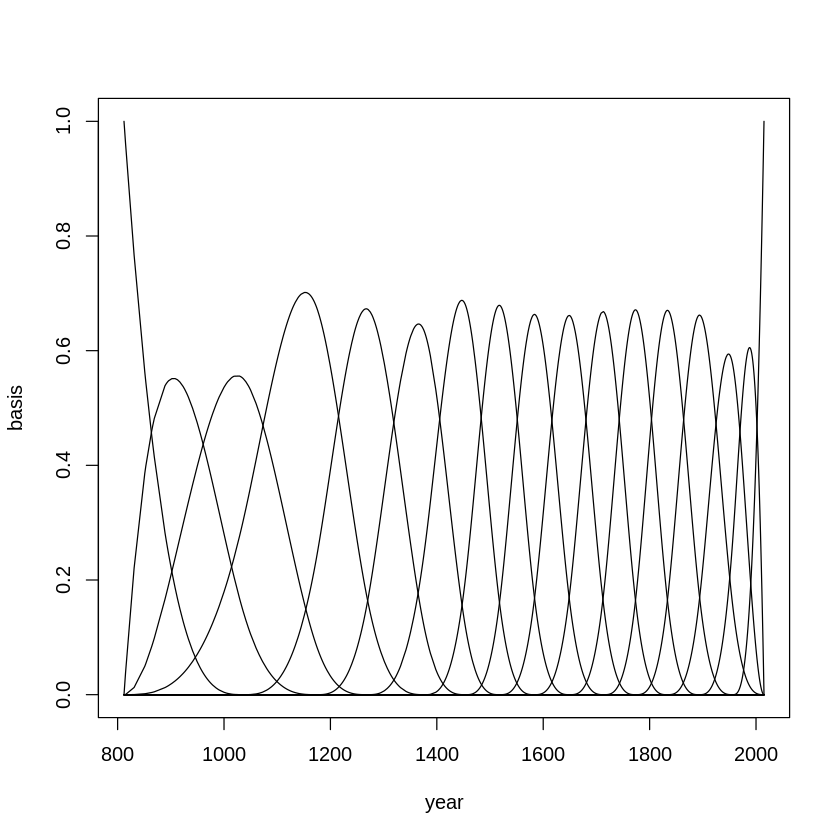

In [ ]:
head(B)

plot(NULL, xlim=range(d2$year), ylim=c(0,1), xlab="year", ylab="basis")
for(i in 1:ncol(B)){
  lines(d2$year, B[,i])
}

We get the final spline by multiplying each of these 15 curves by some *weight* $w$.  We'll build a model to do this.

In [ ]:
m4.7 <- quap(
  alist(
    D ~ dnorm(mu, sigma),
      mu <- a + B %*% w,
        a ~ dnorm(100, 10),
        w ~ dnorm(0, 10),
      sigma ~ dexp(1)
  ), data=list(D=d2$doy, B=B),
     start=list(w=rep(0, ncol(B)))
)

Model `m4.7` has estimated parameter values for `a`, `sigma`, and each of the 15 `w`'s.

In [ ]:
precis(m4.7, depth=2)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
w[1],-3.0227869,3.8612608,-9.19382742,3.148254
w[2],-0.8327330,3.8702437,-7.01812984,5.352664
w[3],-1.0608332,3.5850028,-6.79035999,4.668694
w[4],4.8555644,2.8771505,0.25732226,9.453807
w[5],-0.8435732,2.8743683,-5.43736886,3.750223
w[6],4.3308792,2.9148829,-0.32766665,8.989425
w[7],-5.3205348,2.8002471,-9.79587057,-0.845199
w[8],7.8518810,2.8021001,3.37358385,12.330178
w[9],-1.0046637,2.8810761,-5.60917976,3.599852


Let's visualize the posterior.

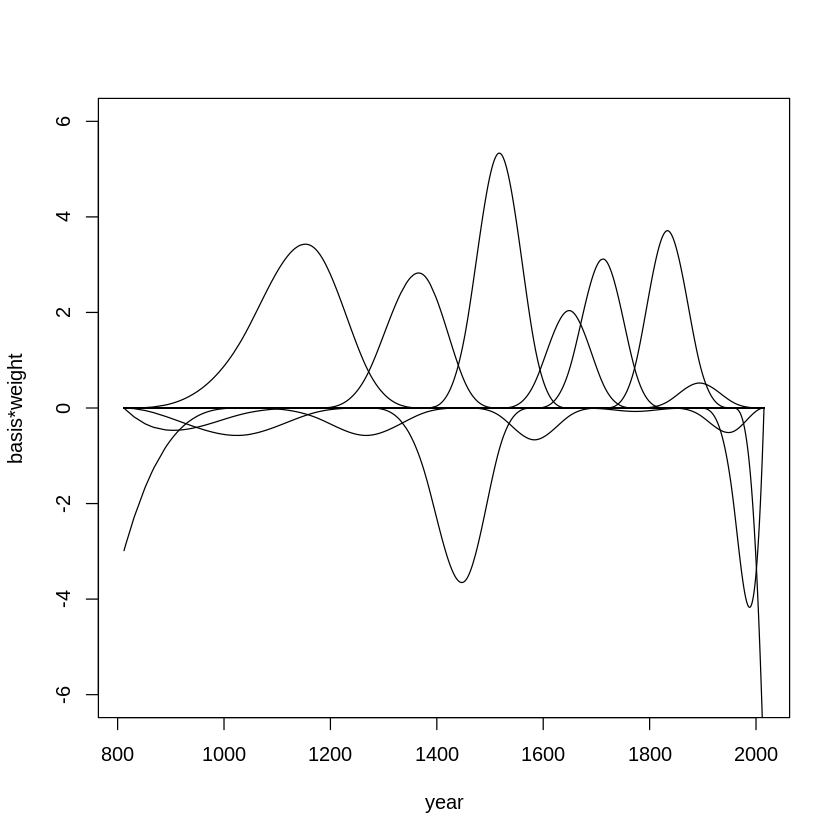

In [ ]:
post <- extract.samples(m4.7)
w <- apply(post$w, 2, mean)

plot(NULL, xlim=range(d2$year), ylim=c(-6,6), xlab="year", ylab="basis*weight")
for(i in 1:ncol(B)){
  lines(d2$year, w[i]*B[,i])
}

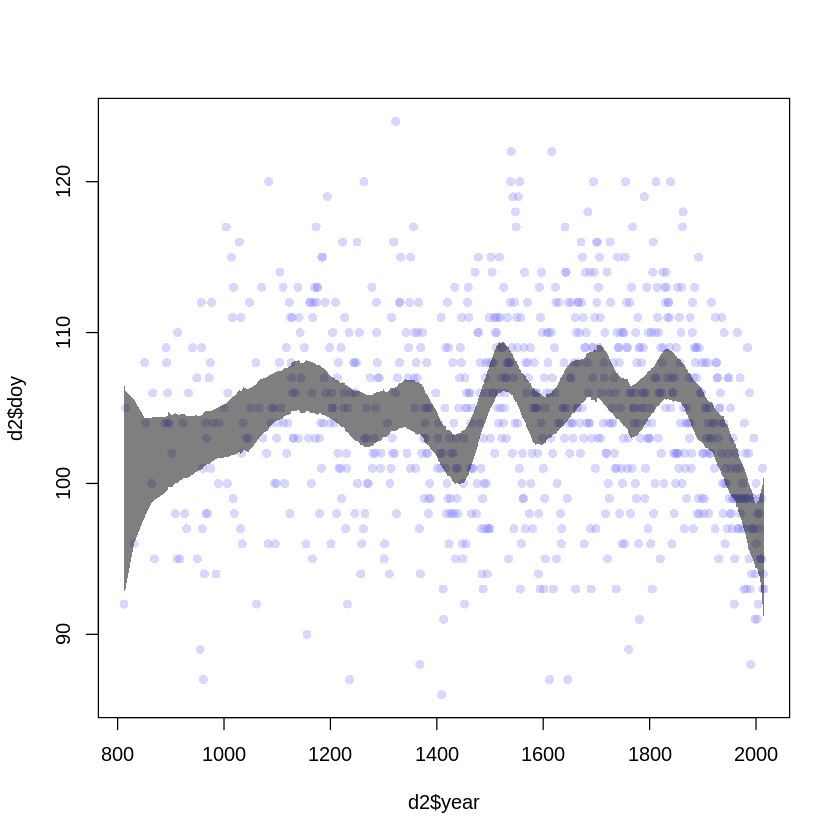

In [ ]:
mu <- link(m4.7)
mu_HPDI <- apply(mu, 2, HPDI, 0.97)

plot(d2$doy ~ d2$year, col=col.alpha(rangi2, 0.3), pch=16)
shade(mu_HPDI, d2$year, col=col.alpha("black", 0.5))

Now that we've replicated the code from the book, let's
*   Increase the number of knots
*   Adjust the width of the prior on $w$

We'll start by doubling the number of knots.

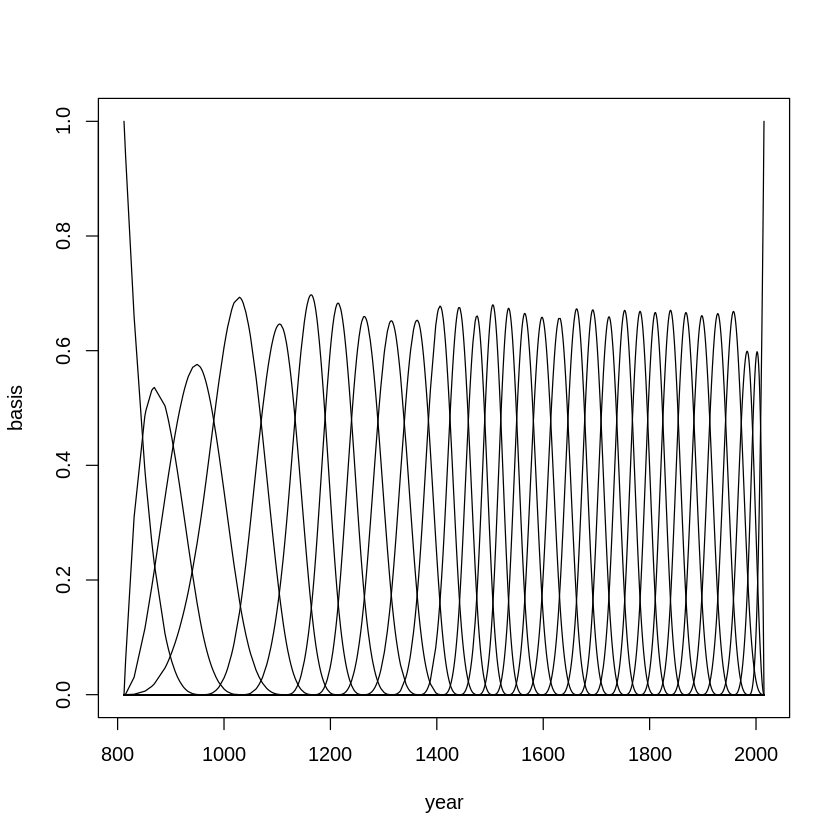

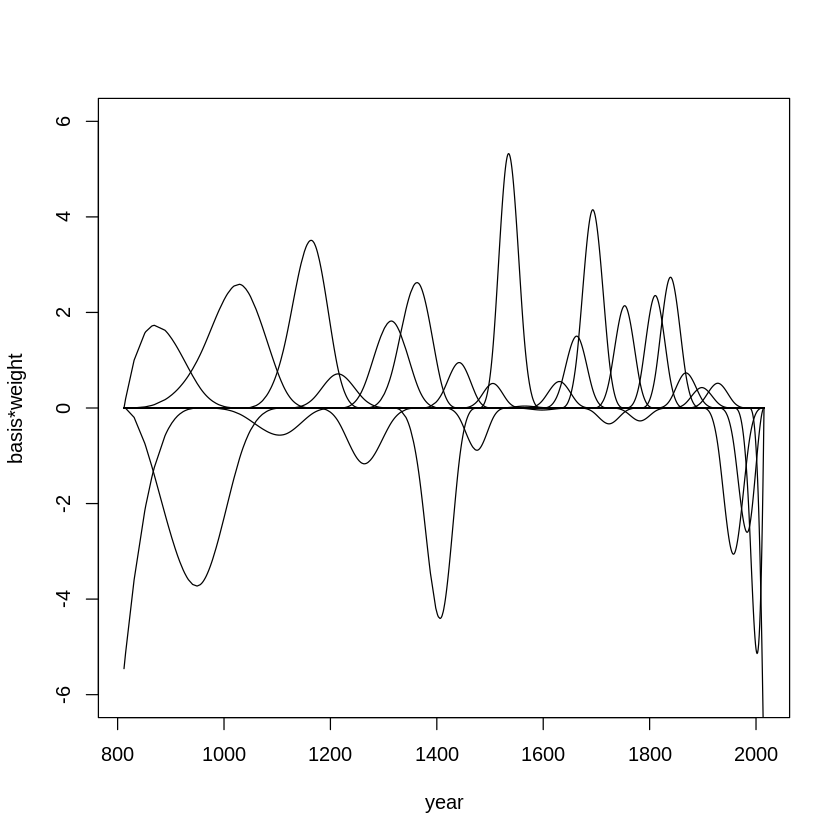

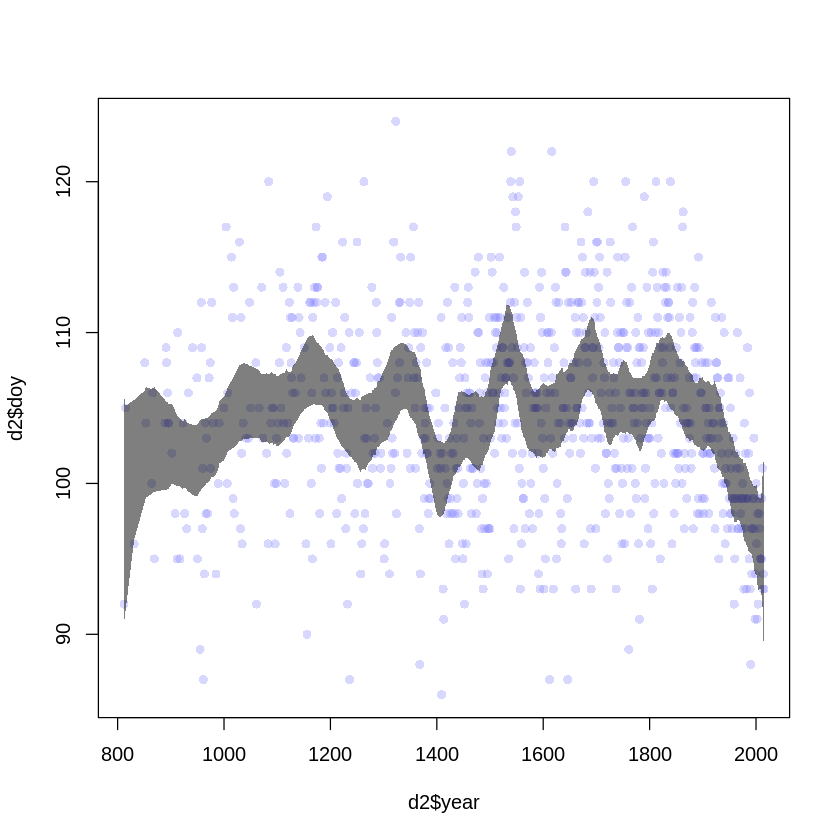

In [ ]:
num_knots2 <- 30
knot_list2 <- quantile(d2$year, probs=seq(from=0, to=1, length.out=num_knots2))

B2 <- bs(d2$year,
        knots=knot_list2[-c(1, num_knots2)],
        degree=knot_degree,
        intercept=TRUE)

plot(NULL, xlim=range(d2$year), ylim=c(0,1), xlab="year", ylab="basis")
for(i in 1:ncol(B2)){
  lines(d2$year, B2[,i])
}

m4.7b <- quap(
  alist(
    D ~ dnorm(mu, sigma),
      mu <- a + B %*% w,
        a ~ dnorm(100, 10),
        w ~ dnorm(0, 10),
      sigma ~ dexp(1)
  ), data=list(D=d2$doy, B=B2),
     start=list(w=rep(0, ncol(B2)))
)

post2 <- extract.samples(m4.7b)
w <- apply(post2$w, 2, mean)

plot(NULL, xlim=range(d2$year), ylim=c(-6,6), xlab="year", ylab="basis*weight")
for(i in 1:ncol(B2)){
  lines(d2$year, w[i]*B2[,i])
}

mu2 <- link(m4.7b)
mu_HPDI2 <- apply(mu2, 2, HPDI, 0.97)

plot(d2$doy ~ d2$year, col=col.alpha(rangi2, 0.3), pch=16)
shade(mu_HPDI2, d2$year, col=col.alpha("black", 0.5))

By adding more knots, the spline gets more *wiggly*.  This should make sense; more knots means there are more places for the spline to bend.

Next, we'll increase the standard deviation for the prior of $w$.

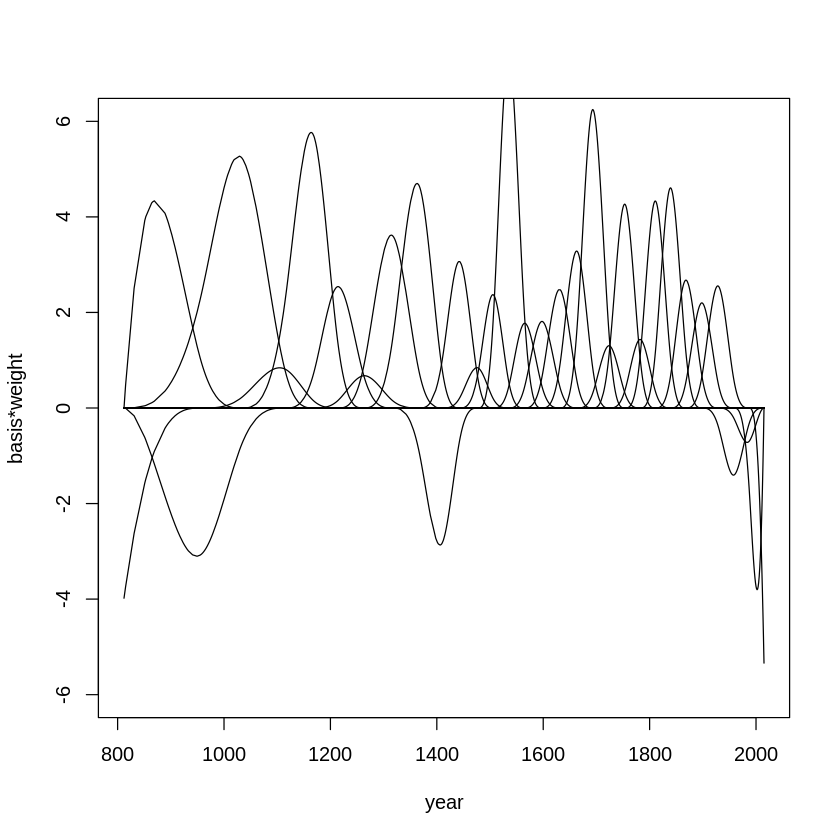

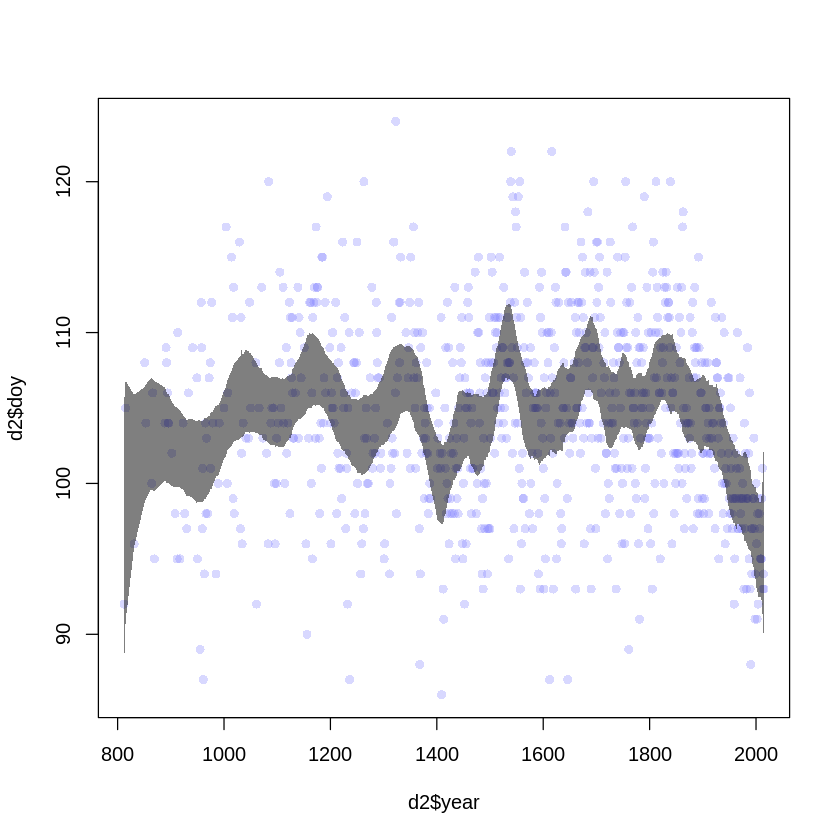

In [ ]:
m4.7c <- quap(
  alist(
    D ~ dnorm(mu, sigma),
      mu <- a + B %*% w,
        a ~ dnorm(100, 10),
        w ~ dnorm(0, 100),
      sigma ~ dexp(1)
  ), data=list(D=d2$doy, B=B2),
     start=list(w=rep(0, ncol(B2)))
)

post3 <- extract.samples(m4.7c)
w <- apply(post3$w, 2, mean)

plot(NULL, xlim=range(d2$year), ylim=c(-6,6), xlab="year", ylab="basis*weight")
for(i in 1:ncol(B2)){
  lines(d2$year, w[i]*B2[,i])
}

mu3 <- link(m4.7c)
mu_HPDI3 <- apply(mu3, 2, HPDI, 0.97)

plot(d2$doy ~ d2$year, col=col.alpha(rangi2, 0.3), pch=16)
shade(mu_HPDI3, d2$year, col=col.alpha("black", 0.5))

## Hard
### 4H1
#### Question
The weights listed below were recorded in the !Kung census, but heights were not recorded for  these individuals.  Provide predicted heights and 89% intervals for each of these individuals. That is, fill in the table below, using model-based predictions.

| Individual | Weight | Expected Height | 89% CrI |
| ---------- | ------ | --------------- | ------- |
| 1          | 46.95  |                 |         |
| 2          | 43.72  |                 |         |
| 3          | 64.78  |                 |         |
| 4          | 32.59  |                 |         |
| 5          | 54.63  |                 |         |

#### Answer
To start, we need to run model `m4.3` from the chapter.

In [ ]:
data(Howell1)
d <- Howell1
d2 <- d[d$age >= 18,]
xbar <- mean(d2$weight)

m4.3 <- quap(
  alist(
    height ~ dnorm(mu, sigma),
      mu <- a + b*(weight - xbar),
        a ~ dnorm(178, 20),
        b ~ dlnorm(0, 1),
      sigma ~ dunif(0, 50)
  ), data=d2
)

Let's also put the given weights into a vector; this will come in handy later.

In [ ]:
weights <- c(46.95, 43.72, 64.78, 32.59, 54.63)

To fill out the 3rd column, *Expected Heights* based on *Weight*, we need to build the posterior for `mu` with our estimated parameters (`a` and `b`) and the provided `weight` values.  We'll do this by first sampling `a` and `b` from the posterior and then combinding them with *Weight* to find the *Expected Heights*.

In [ ]:
post <- extract.samples(m4.3)

estimate_height <- function(weight){
  height_samples <- rnorm(n = length(post$a),
                          mean = post$a + post$b*(weight-xbar),
                          sd = post$sigma)
  expected_height <- mean(height_samples)
  HPDI_89 <- HPDI(height_samples, prob=0.89)
  return(c(expected_height, HPDI_89))
}

(expected_heights <- sapply(weights, estimate_height))

,156.4414,153.4920,172.4520,143.4619,163.3982
|0.89,148.7044,145.6226,164.4073,135.3420,155.2309
0.89|,164.8126,161.8974,180.5830,151.4905,171.3696


In [ ]:
final_table <- round(cbind(weights, t(expected_heights)),2)
colnames(final_table) <- c("Weight", "Expected Height", "5.5%", "94.5%")
final_table

Weight,Expected Height,5.5%,94.5%
46.95,156.44,148.70,164.81
43.72,153.49,145.62,161.90
64.78,172.45,164.41,180.58
32.59,143.46,135.34,151.49
54.63,163.40,155.23,171.37


### 4H2
#### Questions
Select out all the rows in the Howell1 data with ages below 18 years of age. If you do it right, you should end up with a new data frame with 192 rows in it.

1.   Fit a linear regression to these data, using quap. Present and interpret the estimates. For  every 10 units of increase in weight, how much taller does the model predict a child gets?
2.   Plot the raw data, with height on the vertical axis and weight on the horizontal axis. Superimpose the MAP regression line and 89% interval for the mean. Also superimpose the 89% interval for predicted heights.  
3.   What aspects of the model fit concern you? Describe the kinds of assumptions you would  change, if any, to improve the model. You don’t have to write any new code. Just explain what the  model appears to be doing a bad job of, and what you hypothesize would be a better model.

#### Answers
Let's start by selecting cases < 18 years old.

In [ ]:
data(Howell1)
d <- Howell1
d3 <- d[d$age < 18,]
xbar <- mean(d3$weight)
str(d3)

'data.frame':	192 obs. of  4 variables:
 $ height: num  121.9 105.4 86.4 129.5 109.2 ...
 $ weight: num  19.6 13.9 10.5 23.6 16 ...
 $ age   : num  12 8 6.5 13 7 17 16 11 17 8 ...
 $ male  : int  1 0 0 1 0 1 0 1 0 1 ...


Now for the first question.  We can more or less copy and paste from above, but now using the new data.  We should also use new priors since this population, being younger, is likely shorter.  This isn't easy since we're dealing with infant to full-grown people, but we'll give a go any way.

In [ ]:
m <- quap(
  alist(
    height ~ dnorm(mu, sigma),
      mu <- a + b*(weight - xbar),
        a ~ dnorm(150, 40),
        b ~ dlnorm(0, 1),
      sigma ~ dunif(0, 50)
  ), data=d3
)

precis(m)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,108.328518,0.60883004,107.355490,109.301546
b,2.716656,0.06831538,2.607475,2.825837
sigma,8.437163,0.43056332,7.749039,9.125286


We are also asked to say how much taller the individual is for each 10-unit increase in weight.  Here, that is the 10x value for `b`: 10 units of weight translates to 2.7*10=27 cm in height.

Now for the second part--plotting.

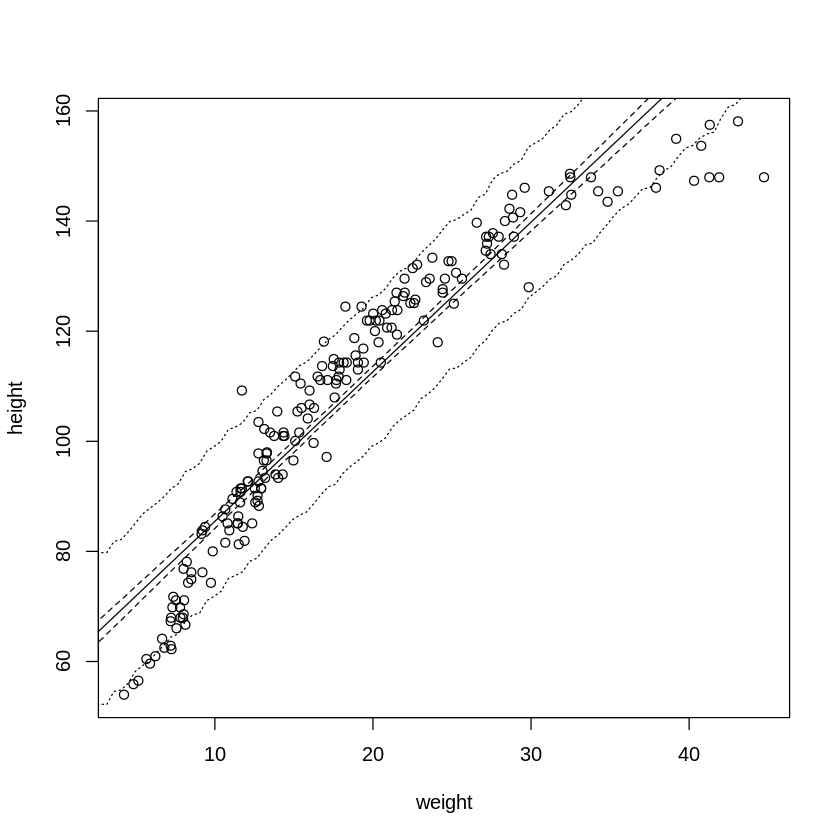

In [ ]:
post <- extract.samples(m)

weight_seq <- seq(from=0, to=max(d3$weight), length.out=100)
mu <- sapply(weight_seq, function(x) mean(post$a + post$b*(x-xbar)))
mu_CrI <- sapply(weight_seq, function(x) HPDI( post$a + post$b*(x-xbar) , prob=0.89 ) )
mu_preds <- sapply(weight_seq, function(x) HPDI(rnorm(n=length(post$a), mean=post$a + post$b*(x-xbar), sd=post$sigma), prob=0.89))

plot(height ~ weight, data=d3)
lines(weight_seq, mu)
lines(weight_seq, mu_CrI[1,], lty=2)
lines(weight_seq, mu_CrI[2,], lty=2)
lines(weight_seq, mu_preds[1,], lty=3)
lines(weight_seq, mu_preds[2,], lty=3)

Finally, we're asked to identify any apparent problems with the model.

To my eye, the data (that is, height as a function of weight) is not stictly linear.  Instead, there is a curvilinear relationship.  Another problem may be that, whereas out model assumes that all data has a standard deviation of `sigma`, the data becomes more variable at greater heights.

### 4H3
#### Question
Suppose a colleague of yours, who works on allometry, glances at the practice problems just above. Your colleague exclaims, “That’s silly. Everyone knows that it’s only the logarithm of body  weight that scales with height!” Let’s take your colleague’s advice and see what happens.  
1.   Model the relationship between height (cm) and the natural logarithm of weight (log-kg). Use  the entire Howell1 data frame, all 544 rows, adults and non-adults. Can you interpret the resulting  estimates?  
2.   Begin with this plot: `plot( height ~ weight, data=Howell1)`. Then use samples  from the quadratic approximate posterior of the model in (1) to superimpose on the plot:
   *   the  predicted mean height as a function of weight,
   *   the 97% interval for the mean, and
   *   the 97%  interval for predicted heights.

#### Answer
Let's start by building the model, this time using the entire data set and regressing on log(weight)

In [ ]:
data(Howell1)
d <- Howell1
log_xbar <- mean(log(d$weight))

m <- quap(
  alist(
    height ~ dnorm(mu, sigma),
      mu <- a + b*(log(weight) - log_xbar),
        a ~ dnorm(150, 40),
        b ~ dnorm(0, 110),
      sigma ~ dunif(0, 50)
  ), data=d
)

precis(m)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,138.263982,0.2201516,137.912137,138.615826
b,47.085854,0.3825897,46.474402,47.697306
sigma,5.134852,0.1556796,4.886046,5.383658


So here's our readout, but it's not straightforward to interpret.  A 1-unit increase in log weight increases height by 47.1 cm, but thinking in terms of log-height is hard.  Let us plot the posterior to see if that will help us make better sense.

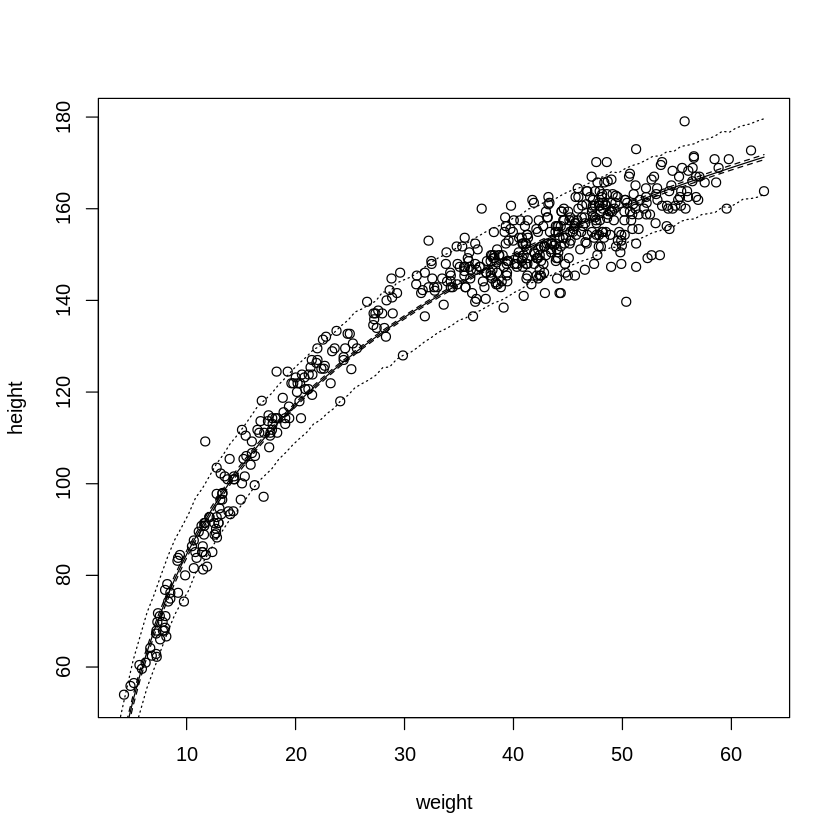

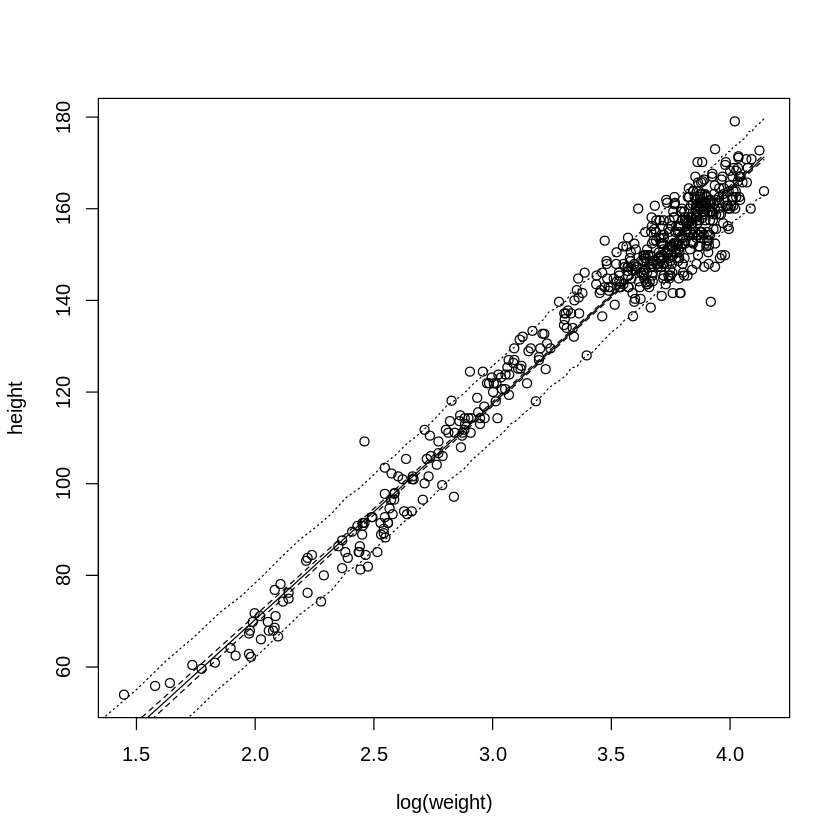

In [ ]:
post <- extract.samples(m)

weight_seq <- seq(from=0, to=max(d$weight), length.out=100)
log_weight_seq <- log(weight_seq)
mu <- sapply(weight_seq, function(x) mean(post$a + post$b*(log(x)-log_xbar)))
mu_CrI <- sapply(weight_seq, function(x) HPDI( post$a + post$b*(log(x)-log_xbar) , prob=0.89 ) )
mu_preds <- sapply(weight_seq, function(x) HPDI(rnorm(n=length(post$a), mean=post$a + post$b*(log(x)-log_xbar), sd=post$sigma), prob=0.89))

plot(height ~ weight, data=d)
lines(weight_seq, mu)
lines(weight_seq, mu_CrI[1,], lty=2)
lines(weight_seq, mu_CrI[2,], lty=2)
lines(weight_seq, mu_preds[1,], lty=3)
lines(weight_seq, mu_preds[2,], lty=3)

plot(height ~ log(weight), data=d)
lines(log_weight_seq, mu)
lines(log_weight_seq, mu_CrI[1,], lty=2)
lines(log_weight_seq, mu_CrI[2,], lty=2)
lines(log_weight_seq, mu_preds[1,], lty=3)
lines(log_weight_seq, mu_preds[2,], lty=3)

Interesting.  We used a linear model with log(weight); on the raw scale, then, the posterior is non-linear.

### 4H4
#### Question
Plot the prior predictive distribution for the parabolic polynomial regression model in the chapter. You can modify the code that plots the linear regression prior predictive distribution. Can you modify the prior distributions of α, β1, and β2 so that the prior predictions stay within the biologically reasonable outcome space? That is to say: Do not try to fit the data by hand. But do try to  keep the curves consistent with what you know about height and weight, before seeing these exact data.

#### Answer
Let us start by copy-pasting the model from the chapter.

In [ ]:
data(Howell1)
d <- Howell1

d$weight_s <- (d$weight - mean(d$weight))/sd(d$weight)
d$weight_s2 <- d$weight_s^2

m4.5 <- quap(
  alist(
    height ~ dnorm(mu , sigma),
      mu <- a + b1*weight_s + b2*weight_s2 ,
        a ~ dnorm(178 ,20),
        b1 ~ dlnorm(0,1) ,
        b2 ~ dnorm(0,1),
      sigma ~ dunif(0,50)
) , data=d )

Now we need to extract the prior in order to construct our prior predictive distribution.  Luckily, the `rethinking` package comes with a handy command called `extract.prior()`.

In [ ]:
prior <- extract.prior(m4.5)

`extract.prior` works similarly to `extract.samples`, but now the samples are coming from the prior rather than posterior.  Let's start by seeing a summary of `prior` samples.

In [ ]:
precis(prior)

,mean,sd,5.5%,94.5%,histogram
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
a,178.04520105,19.840931,146.453171,209.669294,▁▁▁▁▂▃▅▇▅▃▃▁▁▁
b1,1.61023008,2.046844,0.218389,4.731366,▇▁▁▁▁▁▁
b2,0.01393553,1.005260,-1.564176,1.616609,▁▁▁▂▃▅▇▇▅▃▂▁▁▁
sigma,24.68132861,14.414749,2.427307,47.288465,▇▇▅▇▅▇▇▇▇▇


Now let's work on visualizing `height` as a function of `weight`.

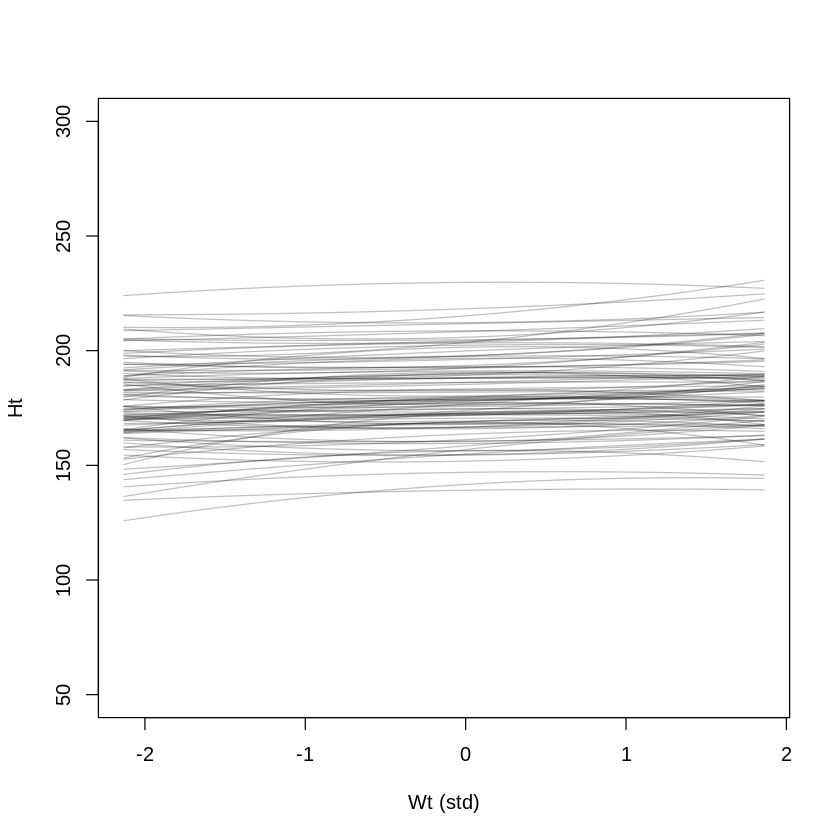

In [ ]:
weight_seq <- seq(from=min(d$weight_s), to=max(d$weight_s), length.out=100)
weight2_seq <- weight_seq^2

mu <- link(m4.5, post=prior, data=list(weight_s=weight_seq, weight_s2=weight2_seq))

plot(NULL, xlim=range(weight_seq), ylim=c(50,300), xlab="Wt (std)", ylab="Ht")
for(i in 1:length(weight_seq)){
  lines(weight_seq, mu[i,], col=col.alpha("black", 0.25))
}

What do we think about these priors?  For the most part, they don't seem to anticipate much change in height with weight; a 1-standard deviation change in wt (about 15 kg) hardly predicts greater height.  

How can we improve this?  For one, think about what `b1` and `b2` *do* to the curve:
*   `b1` casts the initial trajectory of the curve from the left to the right.  So we need it to be positive.
*   `b2` bends the curve.  We generally need the curve to bend down, since there is a *leveling-off* of height with weight.
*   From earlier problems, we know that a cubic term `b3` might be helpful since the relationship between height and weight is somewhat S-shaped.  But we'll ignore that possibility here.

Let's try a couple things.

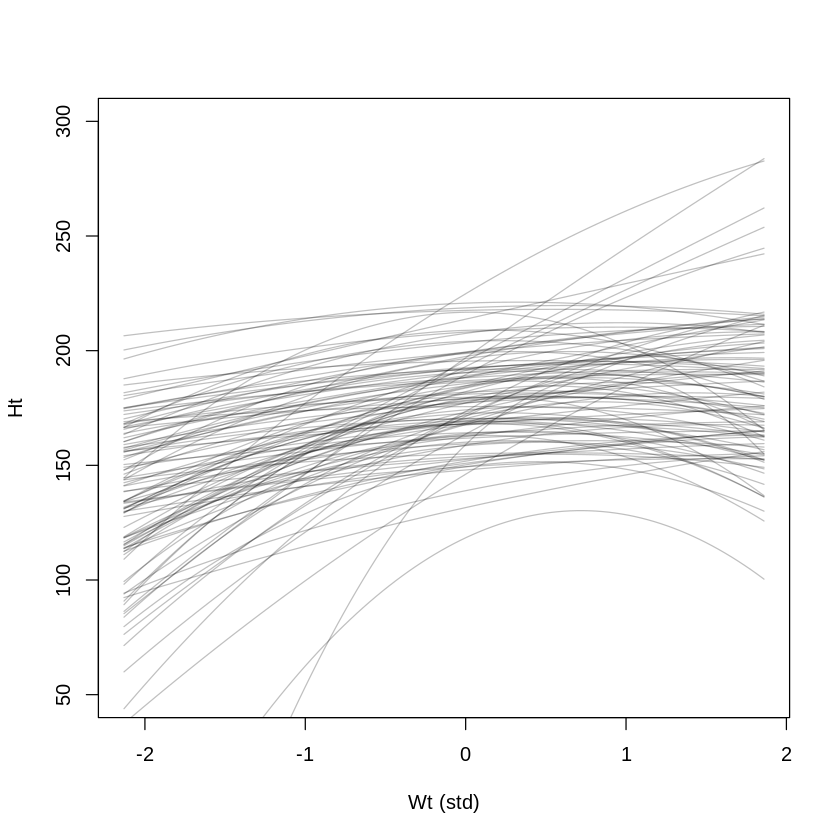

In [ ]:
m4.5b <- quap(
  alist(
    height ~ dnorm(mu , sigma),
      mu <- a + b1*weight_s - b2*weight_s2 ,
        a ~ dnorm(178 ,20),
        b1 ~ dlnorm(2,1) ,
        b2 ~ dlnorm(1,1),
      sigma ~ dunif(0,50)
) , data=d )

priorb <- extract.prior(m4.5b)

mub <- link(m4.5b, post=priorb, data=list(weight_s=weight_seq, weight_s2=weight2_seq))

plot(NULL, xlim=range(weight_seq), ylim=c(50,300), xlab="Wt (std)", ylab="Ht")
for(i in 1:length(weight_seq)){
  lines(weight_seq, mub[i,], col=col.alpha("black", 0.25))
}

This is a little better.  The major differences is that I've nudged the priors for `b1` and `b2` further from 0, and subtracted the `b2` term to encourage that downward bending.  At least the prior seems to expect some realisitic relationships between height and weight.  Yes, there are some very extreme, unrealistic trajectories.  The problem is with polynomials; every term in a polynomial change the affects the entire curve...and this makes the curves hard to control.  

### 4H5
#### Question
Return to `data(cherry_blossoms)` and model the association between blossom date (`doy`) and March temperature (`temp`). Note that there are many missing values in both variables. You may consider a linear model, a polynomial, or a spline on temperature. How well does temperature trend  predict the blossom trend?

#### Answer
In our previous models with the `cherry_blossoms` data, we simply regressed `doy` on splines over `year`.  Now we're using a different predictor variable: `temp`.  This means that we'll have to build our spline over temperature values instead of `year`.  Let's start by getting our data together.

In [12]:
data(cherry_blossoms)
d <- cherry_blossoms
d2 <- d[complete.cases(d$doy, d$temp), c("doy", "temp")]
str(d2)
head(d2)
range(d2$temp)

'data.frame':	787 obs. of  2 variables:
 $ doy : int  108 100 106 104 109 108 106 104 104 102 ...
 $ temp: num  7.38 6.42 6.44 6.83 6.98 7.11 6.98 7.08 7.2 7.5 ...


,doy,temp
,<int>,<dbl>
51,108,7.38
64,100,6.42
66,106,6.44
89,104,6.83
91,109,6.98
92,108,7.11


[1] 4.69 8.30

Next, we'll build a model.  We've seen both spline and polynomial models.  My preference between the two, givn what we've learned about polynomial models, as well as the fact that our first model with the `cherry_blossoms` data was also a spline, is to build another spline.  So like we did in earlier questions, let's start by defining our splines.

 'bs' num [1:787, 1:8] 0 0 0 0 0 0 0 0 0 0 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:8] "1" "2" "3" "4" ...
 - attr(*, "degree")= int 3
 - attr(*, "knots")= Named num [1:4] 5.48 5.92 6.2 6.57
  ..- attr(*, "names")= chr [1:4] "20%" "40%" "60%" "80%"
 - attr(*, "Boundary.knots")= num [1:2] 4.69 8.3
 - attr(*, "intercept")= logi TRUE


1,2,3,4,5,6,7,8
0,0,0,0.000000000,0.09005776,0.3829088,0.424393413,0.102640025
0,0,0,0.012874554,0.74749130,0.2331084,0.006525709,0.000000000
0,0,0,0.008380858,0.73055039,0.2525966,0.008472146,0.000000000
0,0,0,0.000000000,0.36737504,0.4952535,0.133976899,0.003394546
0,0,0,0.000000000,0.26599865,0.5054068,0.215283506,0.013311079
0,0,0,0.000000000,0.19489403,0.4854701,0.289223983,0.030411859


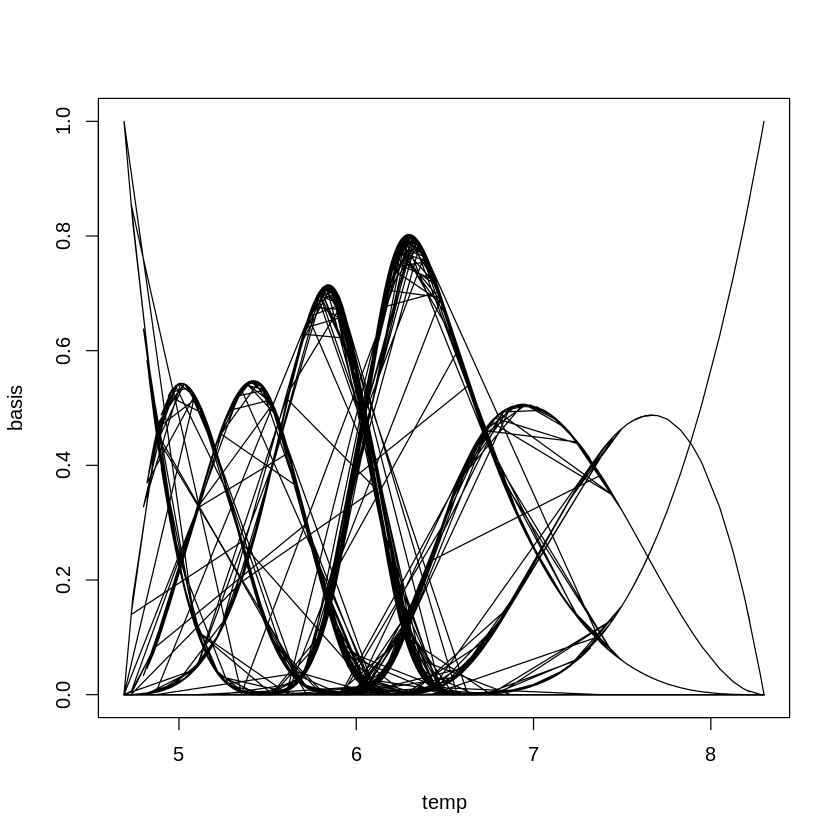

In [13]:
num_knots <- 6 # I'm going w/6 knots because that range of our data spans about 6 degrees of temperature
knot_list <- quantile(d2$temp, probs=seq(from=0, to=1, length.out=num_knots))
knot_degree <- 3

library(splines)
B <- bs(d2$temp,
        knots=knot_list[-c(1, num_knots)],
        degree=knot_degree,
        intercept=TRUE)

str(B)
head(B)

plot(NULL, xlim=range(d2$temp), ylim=c(0,1), xlab="temp", ylab="basis")
for(i in 1:ncol(B)){
  lines(d2$temp, B[,i])
}

Now let's make a model.

In [14]:
m <- quap(
  alist(
    D ~ dnorm(mu, sigma),
      mu <- a + B %*% w,
        a ~ dnorm(105, 15),
        w ~ dnorm(0, 15),
      sigma ~ dexp(1)
  ), data=list(D=d2$doy, B=B),
     start=list(w=rep(0, ncol(B)))
)

precis(m, depth=2)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
w[1],5.1674769,5.6695405,-3.893544,14.228498
w[2],2.1626924,5.5595277,-6.722507,11.047891
w[3],3.4087091,5.2991014,-5.060279,11.877697
w[4],1.1395369,5.1000020,-7.011251,9.290325
w[5],-0.4711801,5.0702020,-8.574342,7.631982
w[6],-1.9225544,5.3779633,-10.517578,6.672470
w[7],-5.4207360,5.7787126,-14.656235,3.814763
w[8],-5.3808414,5.4805044,-14.139746,3.378063
a,104.6472538,5.0123805,96.636502,112.658006


That output isn't easy to interpret, so let's plot.

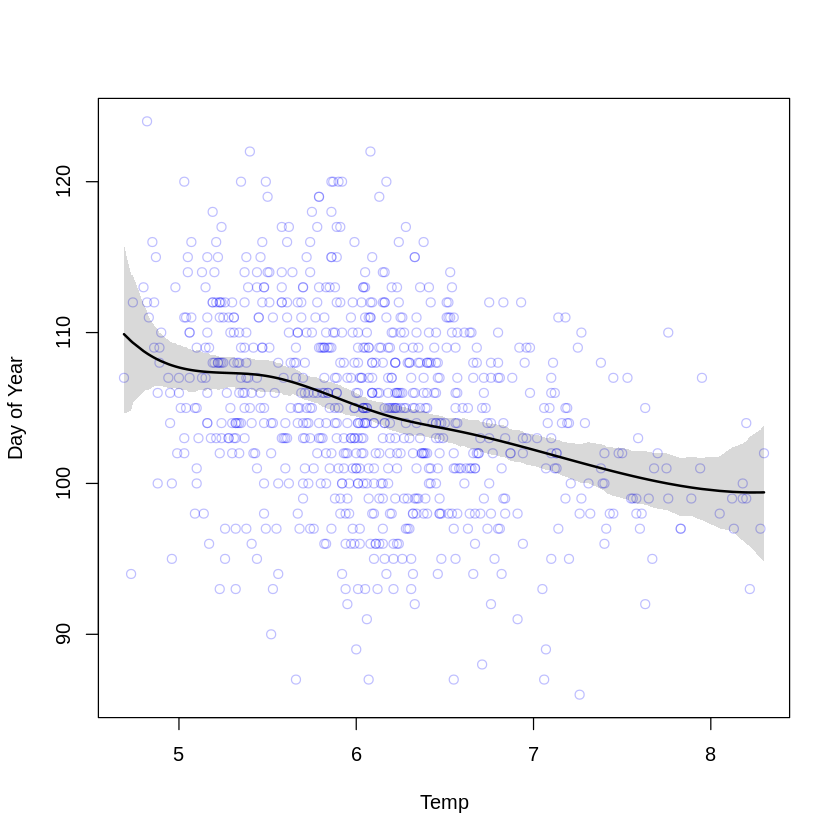

In [15]:
mu <- link(m)
mu_mean <- apply(mu, 2, mean)
mu_HPDI <- apply(mu, 2, HPDI, 0.95)

temp_order <- order(d2$temp) # IMPORTANT STEP HERE: The temps aren't ordered in the dataset.  So here, we create an index that orders by temp

plot(d2$temp, d2$doy, col=col.alpha("blue", 0.25), xlab="Temp", ylab="Day of Year")
lines(d2$temp[temp_order], mu_mean[temp_order], lwd=2)
shade(mu_HPDI[,temp_order], d2$temp[temp_order])


It seems that doy generally decreases (slightly) with increasing temperature.  There is some wiggle in the graph, which is probably noise.  In hindshight, we might have used a straightforward linear model--no spline.  But then again, our posterior may only be modeled by a straight line because of the limits of our data; if it contained higher/lower temperatures, we might have seen a more curvilinear relationship.

### 4H6
#### Question
Simulate the prior predictive distribution for the cherry blossom spline in the chapter. Adjust the prior on the weights and observe what happens. What do you think the prior on the weights is doing?

#### Answer
First we need to extract the prior the model `m4.7`.

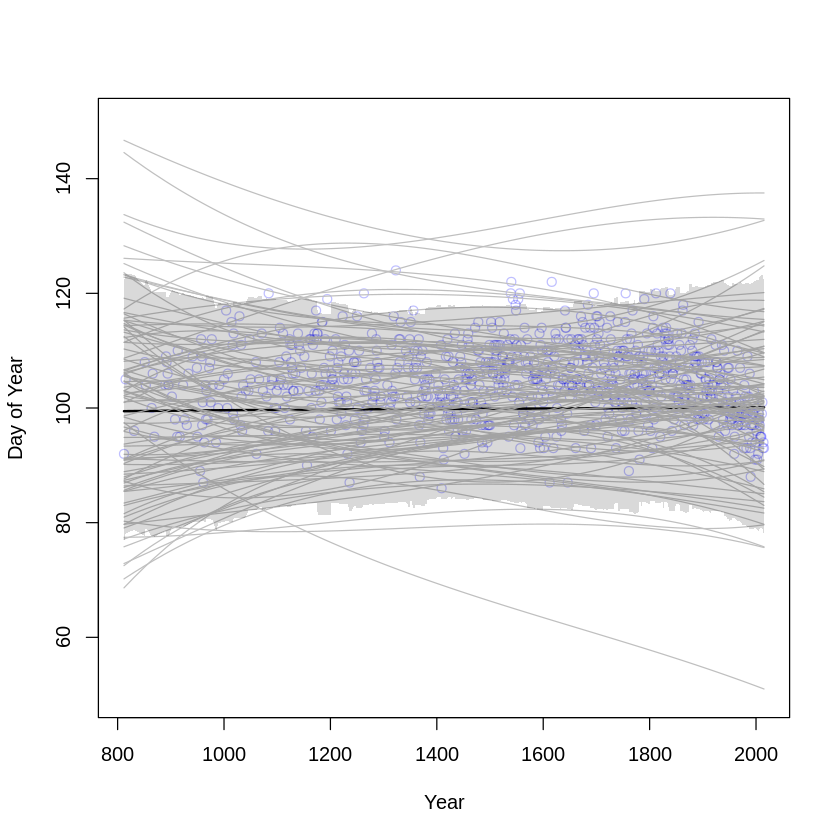

In [29]:
data(cherry_blossoms)
d <- cherry_blossoms
d2 <- d[complete.cases(d$doy),]

library(splines)
B <- bs(d2$year,
        knots=knot_list[-c(1, num_knots)],
        degree=knot_degree,
        intercept=TRUE)

m4.7 <- quap(
  alist(
    D ~ dnorm(mu, sigma),
      mu <- a + B %*% w,
        a ~ dnorm(100, 10),
        w ~ dnorm(0, 10),
      sigma ~ dexp(1)
  ), data=list(D=d2$doy, B=B),
     start=list(w=rep(0, ncol(B)))
)

prior <- extract.prior(m4.7)
mu <- link(m4.7, post=prior)
mu_mean <- apply(mu, 2, mean)
mu_HPDI <- apply(mu, 2, HPDI)

plot(d2$year, d2$doy, col=col.alpha("blue", 0.25), xlab="Year", ylab="Day of Year", ylim=c(50, 150))
lines(d2$year, mu_mean, lwd=2)
for(i in 1:100){
  lines(d2$year, mu[i,], col="grey75")
}
shade(mu_HPDI, d2$year)

Here, I've not only plotted the expected value for doy (black line), which shows no tendency to change over the years, I've also plotted the uncertainty in two ways: a shading envelope and 100 sample splines (lgrey lines) representing different expected trends of `doy` over `years`.

Now we're asked to adjust the priors for the `w` parameters and see what happens to the prior predictive distribution.

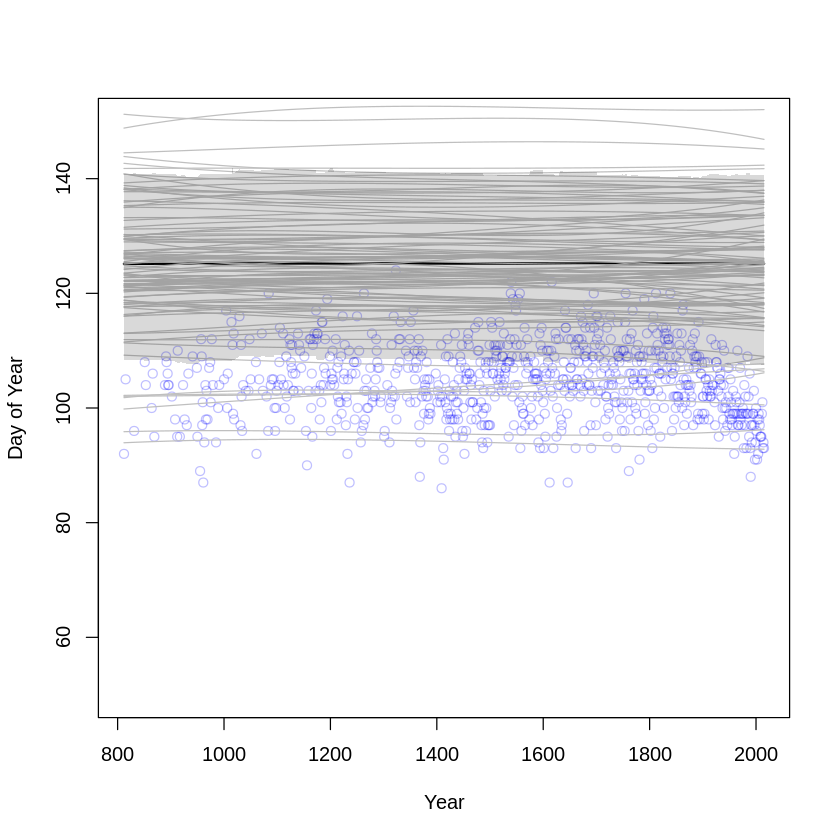

In [40]:
m4.7b <- quap(
  alist(
    D ~ dnorm(mu, sigma),
      mu <- a + B %*% w,
        a ~ dnorm(100, 10),
        w ~ dnorm(25, 2),
      sigma ~ dexp(1)
  ), data=list(D=d2$doy, B=B),
     start=list(w=rep(0, ncol(B)))
)

prior <- extract.prior(m4.7b)
mu <- link(m4.7b, post=prior)
mu_mean <- apply(mu, 2, mean)
mu_HPDI <- apply(mu, 2, HPDI)

plot(d2$year, d2$doy, col=col.alpha("blue", 0.25), xlab="Year", ylab="Day of Year", ylim=c(50, 150))
lines(d2$year, mu_mean, lwd=2)
for(i in 1:100){
  lines(d2$year, mu[i,], col="grey75")
}
shade(mu_HPDI, d2$year)

Here, I've changed both the mean and sd of `w`.  We notice two differences from the initial model.
*   The expectations of the model are that blooming will occur much later in the year.  This is a function of changing the prior mean of `w` from 0 to 25.
*   The splines are much more constrained.  This is a function of reducing the prior sd for `w`.

### 4H7
#### Question
The cherry blossom spline in the chapter used an intercept α, but technically it doesn’t require one. The first basis functions could substitute for the intercept. Try refitting the cherry blossom spline without the intercept. What else about the model do you need to change to make this work?

#### Answer
First off, omitting an intercept is akin to saying that the expected value of `doy` at year 0 is `a=0`; the model is then fitted purely on the `b` coefficients.  In some contexts, something analagous to this might make sense, but not so much here.  Nevertheless, let's remove the intercept.

When we remove the intercept, the previous priors for `w` (mean = 0) won't make any sense; the `b` coefficients need to *take up the slack* for the now-missing `a`.  So we need to adjust the prior for `w`.

In [49]:
data(cherry_blossoms)
d <- cherry_blossoms
d2 <- d[complete.cases(d$doy),]

library(splines)
B <- bs(d2$year,
        knots=knot_list[-c(1, num_knots)],
        degree=knot_degree,
        intercept=TRUE)

m4.7c <- quap(
  alist(
    D ~ dnorm(mu, sigma),
      mu <- 0 + B %*% w,
        w ~ dnorm(100, 10),
      sigma ~ dexp(1)
  ), data=list(D=d2$doy, B=B),
     start=list(w=rep(0, ncol(B)))
)